In [1]:
# Necessary imports
import numpy as np
import cv2
import glob

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from skimage.feature import hog

from scipy.ndimage.measurements import label

from utils import *

# Read in images and create classes for cars and non cars

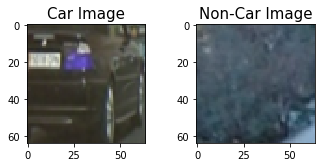

In [2]:
# Read in cars and non cars 

# Standard dataset
cars = glob.glob('vehicles/*/*.png')
non_cars = glob.glob('non-vehicles/*/*.png')

# Randomly display a car and non car image
random = np.random.randint(0, len(cars))
car_img = cv2.imread(cars[random])
non_car_img = cv2.imread(non_cars[random])

ShowTwoImages(car_img, non_car_img, "Car Image", "Non-Car Image")

# Sample HOG detection and visualization

/academics/conda/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


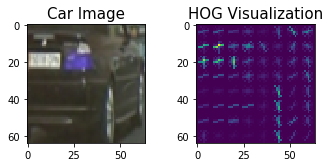

In [3]:
gray = cv2.cvtColor(car_img, cv2.COLOR_RGB2GRAY)

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

# Call our function with vis=True to see an image output
# use feature_vec as false for now
features, hog_img = get_hog_features(gray, orient, 
                        pix_per_cell, cell_per_block, 
                        vis=True, feature_vec=False)



# Plot the examples
ShowTwoImages(car_img, hog_img, "Car Image", "HOG Visualization")